In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [290]:
df = pd.read_csv('auto.txt',delim_whitespace=True)

In [291]:
df.head()

,18.0,8.,307.0,130.0,3504.,12.0,70.,1.,chevrolet chevelle malibu
0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
1,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
2,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
3,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
4,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500


In [292]:
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']

In [293]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
1,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
2,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
3,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
4,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500


In [294]:
df.shape

(405, 9)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       405 non-null float64
displacement    405 non-null float64
horsepower      399 non-null float64
weight          405 non-null float64
acceleration    405 non-null float64
model year      405 non-null float64
origin          405 non-null float64
car name        405 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


In [296]:
#as we can see column mpg and horsepower have missing values
for columns in ['mpg','horsepower']:
    df[columns].fillna(df[columns].mean(), inplace=True)

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 9 columns):
mpg             405 non-null float64
cylinders       405 non-null float64
displacement    405 non-null float64
horsepower      405 non-null float64
weight          405 non-null float64
acceleration    405 non-null float64
model year      405 non-null float64
origin          405 non-null float64
car name        405 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


In [298]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,23.528463,5.469136,194.502469,105.020050,2978.118519,15.528395,75.935802,1.570370
std,7.743104,1.709658,104.903397,38.508127,847.649260,2.801345,3.741767,0.797962
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,76.000000,2226.000000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2815.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,129.000000,3620.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


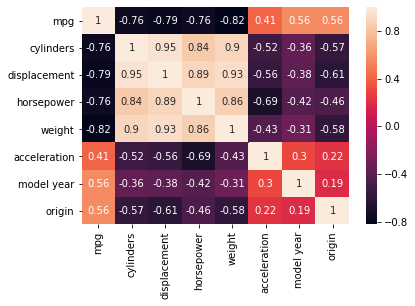

In [299]:
sns.heatmap(df.corr(),annot=True)

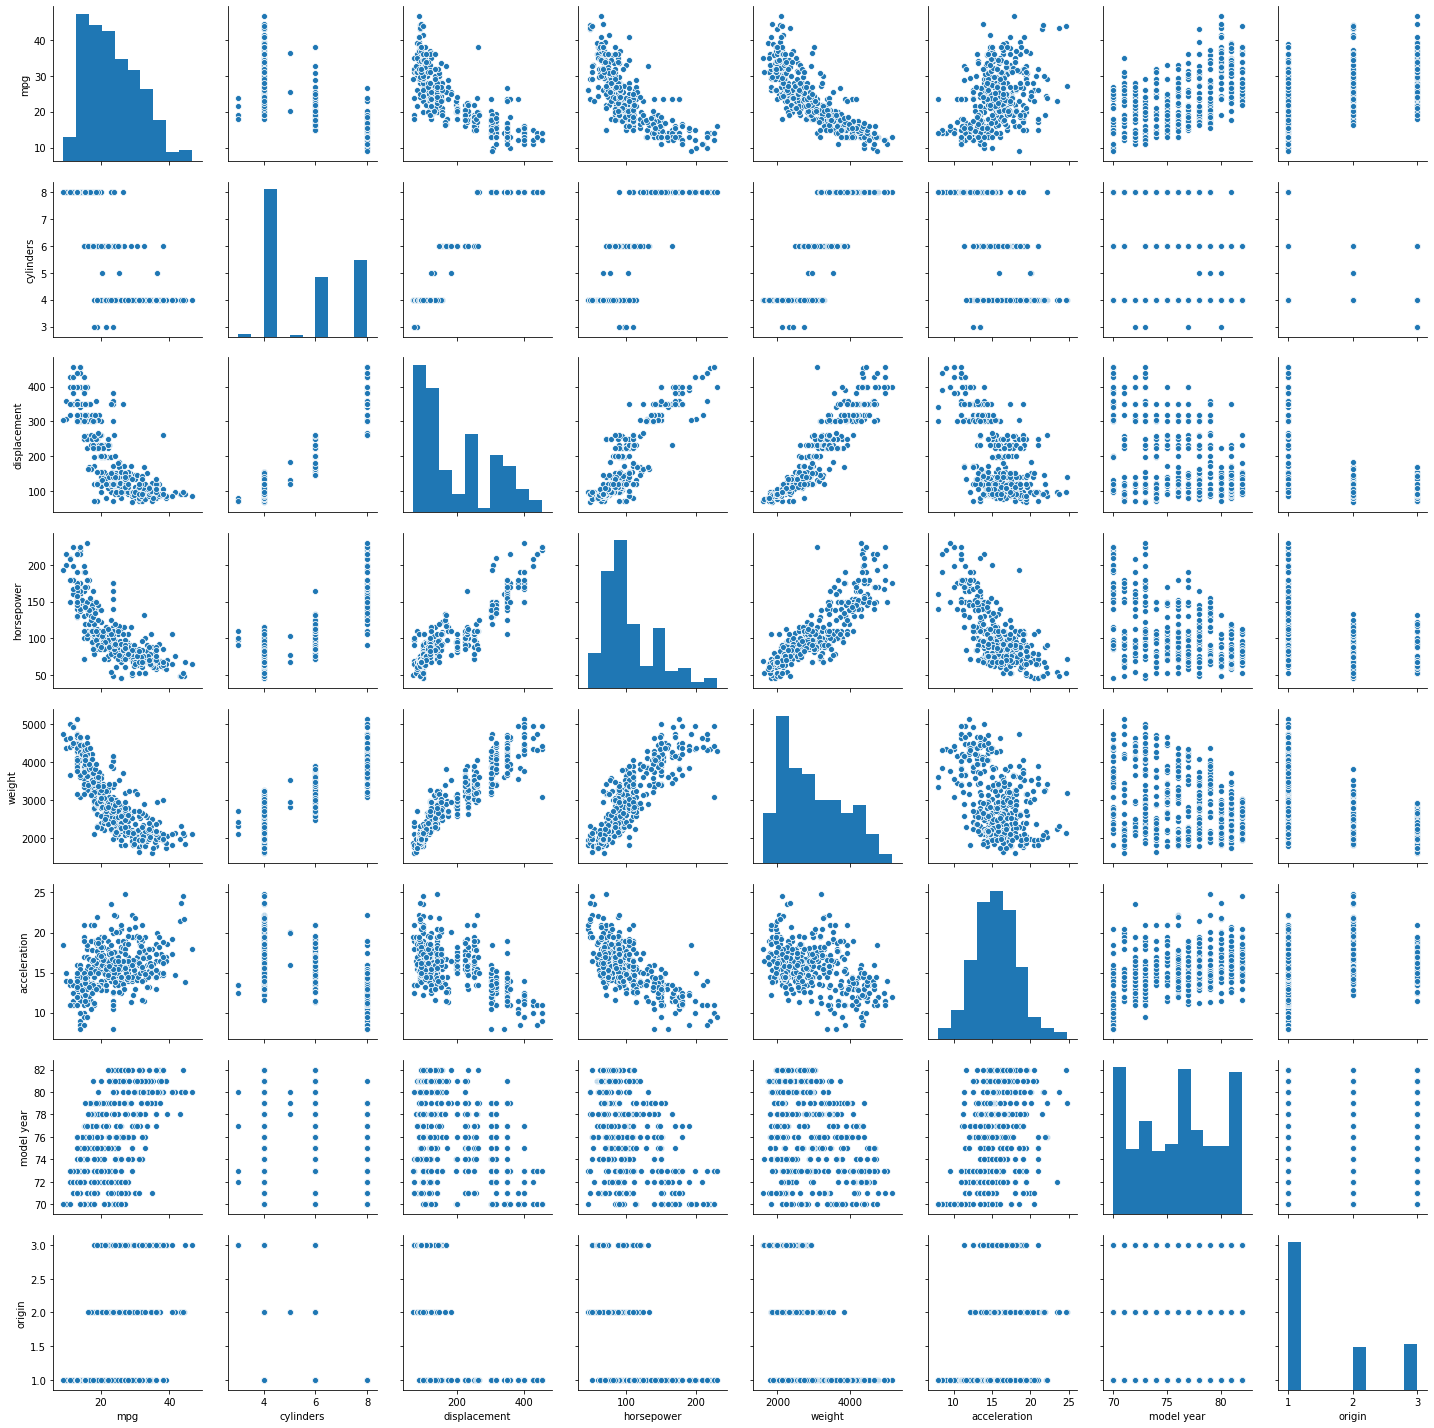

In [300]:
sns.pairplot(data=df)

In [301]:
x = df.drop(['mpg','car name'], axis=1)
y = df['mpg']

In [314]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [315]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)


In [316]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print("r2 train score :", r2_train)
print("r2 test score :", r2_test)
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2 train score : 0.7888841979252041
r2 test score : 0.8014198488482189
RMSE  3.3531433881263233


In [317]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor

In [318]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_test_pred = xgb.predict(x_test)
y_train_pred = xgb.predict(x_train)
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print("r2 train score :", r2_train)
print("r2 test score :", r2_test)

[17:30:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 train score : 0.9605133777404607
r2 test score : 0.8604547123309197


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [319]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_test_pred = rfr.predict(x_test)
y_train_pred = rfr.predict(x_train)
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print("r2 train score :", r2_train)
print("r2 test score :", r2_test)

r2 train score : 0.9666211158826123
r2 test score : 0.859733439052242


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [322]:
#from above score we can see that xgb regressor is best model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(xgb, 'mpg.pkl') 
  
# Load the model from the file 
xgb_from_joblib = joblib.load('mpg.pkl')  
  
# Use the loaded model to make predictions 
xgb_from_joblib.predict(x_test)

[17:32:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([19.11594 , 37.74687 , 29.469069, 28.130396, 19.66107 , 21.710056,
       16.595644, 26.291122, 16.140734, 27.928226, 37.78903 , 13.768073,
       12.939225, 39.571316, 19.044046, 28.941969, 20.998566, 17.667553,
       24.790947, 33.18314 , 24.322487, 26.530941, 25.849672, 23.889679,
       18.074635, 30.493864, 17.463432, 19.626007, 27.859478, 23.222813,
       26.75408 , 22.000101, 19.600328, 15.764669, 16.196281, 33.97403 ,
       18.36289 , 28.786137, 20.915339, 13.468863, 18.310394, 29.587507,
       16.921091, 30.664255, 34.535877, 14.43391 , 12.723077, 29.562359,
       24.127668, 18.9851  , 33.228043, 33.25589 , 17.474977, 13.752884,
       18.262718, 17.176142, 18.584967, 37.13243 , 26.804956, 13.92157 ,
       20.657597, 23.223759, 25.643919, 20.033007, 21.646591, 14.366315,
       24.022074, 24.461277, 38.423576, 21.156208, 36.847607, 26.980896,
       17.60638 , 16.776344, 25.985281, 27.761507, 14.957808, 25.881538,
       12.705347, 27.236351, 35.384117, 27.504265, 